In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
import pyrosetta as py
py.init()

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release 2021.07+release.c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef 2021-02-21T11:50:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release r275 2021.07+release.c48be26 c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef http://www.pyrosetta.org 2021-02-21T11:50:06
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-1367851671 seed_offset=0 real_seed=-1367851671 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=-1367851671 RG_type=m

In [3]:
df = pd.read_pickle('../picked_networks.pickle')
df.shape

(1795, 49)

In [ ]:
print(df)

In [ ]:
print(glob.glob('*_input_*/score.sc'))

In [60]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0      SCORE:    -1239.102               0.0                   0.0   
1      SCORE:    -1234.696               0.0                   0.0   
2      SCORE:    -1241.029               0.0                   0.0   
3      SCORE:    -1236.693               0.0                   0.0   
4      SCORE:    -1240.190               0.0                   0.0   
...       ...          ...               ...                   ...   
17945  SCORE:    -1219.623               0.0                   0.0   
17946  SCORE:    -1226.612               0.0                   0.0   
17947  SCORE:    -1229.439               0.0                   0.0   
17948  SCORE:    -1219.631               0.0                   0.0   
17949  SCORE:    -1230.986               0.0                   0.0   

       dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  \
0                    0.663        0.0 -976.642  208.206 -470.535   
1                    0.

In [4]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


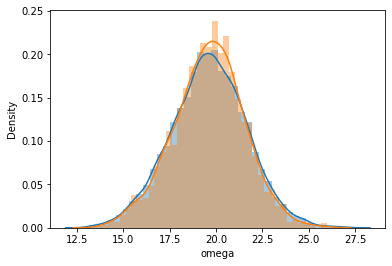

In [8]:
sns.distplot(dall_scores["omega"], bins=40)
sns.distplot(dscore_per_design["omega"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


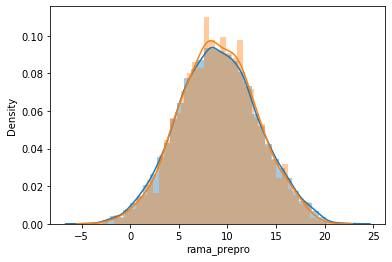

In [12]:
sns.distplot(dall_scores["rama_prepro"], bins=40)
sns.distplot(dscore_per_design["rama_prepro"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


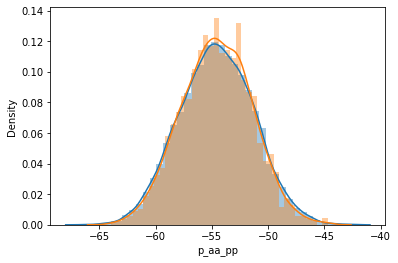

In [13]:
sns.distplot(dall_scores["p_aa_pp"], bins=40)
sns.distplot(dscore_per_design["p_aa_pp"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


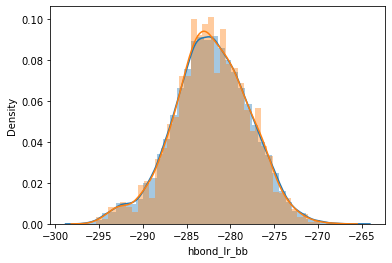

In [14]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=40)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=40)

In [ ]:
hbond_dict = {}
for index,row in df.iterrows():
    hbonds = []
#    my_regex = r"\# " + index + r"_0001_native_network_[1-9].cst\n\# \n"
#    cst = re.split(my_regex,row["network_cst"])
    cst = [row["network_cst_Y114"], row["network_cst_Y26"]]
    for net in cst:
        if net != "":
            tyr_26 = False
            tyr_114 = False
            if " OH  26 " in net:
                tyr_26 = True
            if " OH  114 " in net:
                tyr_114 = True
            lines = net.split('\n')
            for line in lines:
                if "AtomPair " in line:
                    acc_res = int(line.split()[2])
                    don_res = int(line.split()[4])
                    acc_atm = line.split()[1]
                    don_atm = line.split()[3]
                    if acc_atm not in ["CB","N","CA","O"] and don_atm not in ["CB","N","CA","O"]:
                        hbonds.append((acc_res,don_res,acc_atm,don_atm,tyr_26,tyr_114))
    hbond_dict[row["description"]] = hbonds
print(hbond_dict)

In [ ]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
dretained = pd.DataFrame(columns=['%_retained','%_retained_tyr'])

for index,row in df.iterrows():
    interactions = hbond_dict[row["description"]]
    interact_res = Counter([inter[0:2] for inter in interactions])
    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
    num_interactions = float(len(list(interact_res.elements())))
    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
    curr_retention = []
    curr_retention_tyr = []
    for pdb in glob.glob(row["description"] + "/" + row["description"] + "_*.pdb"):
        current_inter_list = []
        pose = py.pose_from_pdb(pdb)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for i in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
        current_inter = Counter(current_inter_list)
        num_curr_inter = 0.0
        num_curr_inter_tyr = 0.0
        for inter in current_inter:
            if inter in interact_res:
                if current_inter[inter] >= interact_res[inter]:
                    num_curr_inter += interact_res[inter]
                elif current_inter[inter] < interact_res[inter]:
                    num_curr_inter += current_inter[inter]
                    
            if inter in interact_res_tyr:
                if current_inter[inter] >= interact_res_tyr[inter]:
                    num_curr_inter_tyr += interact_res_tyr[inter]
                elif current_inter[inter] < interact_res_tyr[inter]:
                    num_curr_inter_tyr += current_inter[inter]
        curr_retention.append(num_curr_inter/num_interactions)
        curr_retention_tyr.append(num_curr_inter_tyr/num_interactions_tyr)
    dretained.loc[index] = [sum(curr_retention)/len(curr_retention), sum(curr_retention_tyr)/len(curr_retention_tyr)]
print(dretained)
        
        
#                        print(pose.residue(hbond_set.hbond(i).don_res()).atom_name(pose.residue(hbond_set.hbond(i).don_res()).first_adjacent_heavy_atom(hbond_set.hbond(i).don_hatm())))
                

In [8]:
dretained.to_pickle('networks_hbond_retention.pickle')

In [9]:
dretained = pd.read_pickle('networks_hbond_retention.pickle')

In [10]:
print(dretained)

       %_retained  %_retained_tyr
0        1.000000        1.000000
5        1.000000        1.000000
11       0.857143        0.857143
13       0.988889        0.988889
14       0.885714        0.885714
...           ...             ...
10789    1.000000        1.000000
10790    1.000000        1.000000
10791    1.000000        1.000000
10794    1.000000        1.000000
10812    0.937500        0.937500

[1795 rows x 2 columns]


/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


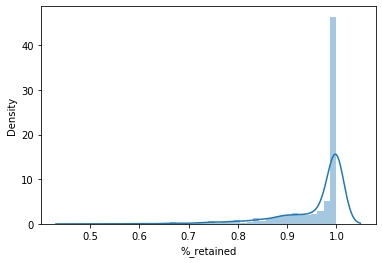

In [11]:
sns.distplot(dretained["%_retained"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


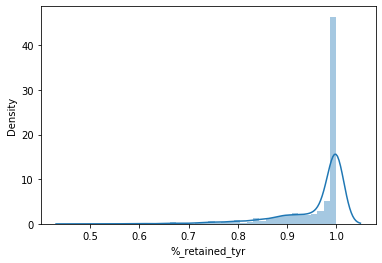

In [12]:
sns.distplot(dretained["%_retained_tyr"], bins=40)

In [ ]:
sns.jointplot("%_retained", "%_retained_tyr", dretained, kind='kde')

In [18]:
dstable = dretained.loc[dretained["%_retained_tyr"] == 1.0]
dstable.shape

(1006, 2)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


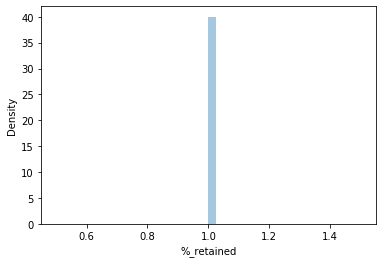

In [19]:
sns.distplot(dstable["%_retained"], bins=40)

In [20]:
dstable.sort_values(by=['%_retained_tyr'])

,%_retained,%_retained_tyr
0,1.0,1.0
6824,1.0,1.0
6828,1.0,1.0
6832,1.0,1.0
6857,1.0,1.0
...,...,...
4136,1.0,1.0
4138,1.0,1.0
4140,1.0,1.0
4017,1.0,1.0


In [ ]:
print(picked_names)

In [62]:
picked_list = dstable.index.tolist()
picked_names = df["description"].loc[picked_list].tolist()
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))

dscore_picked = dall_scores.loc[dall_scores["description"].isin(picked_names)]
print(dscore_picked)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
26     SCORE:    -1188.953               0.0                   0.0   
29     SCORE:    -1187.280               0.0                   0.0   
134    SCORE:    -1218.503               0.0                   0.0   
135    SCORE:    -1220.758               0.0                   0.0   
138    SCORE:    -1217.031               0.0                   0.0   
...       ...          ...               ...                   ...   
17886  SCORE:    -1253.845               0.0                   0.0   
17888  SCORE:    -1253.071               0.0                   0.0   
17889  SCORE:    -1250.379               0.0                   0.0   
17892  SCORE:    -1227.319               0.0                   0.0   
17899  SCORE:    -1228.459               0.0                   0.0   

       dihedral_constraint  dslf_fa13   fa_atr   fa_dun  fa_elec  \
26                   1.428        0.0 -989.065  192.376 -430.053   
29                   1.

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


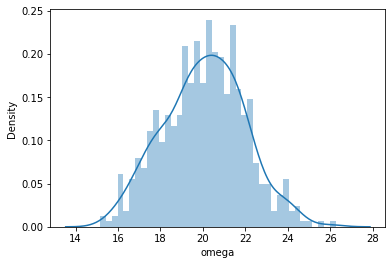

In [63]:
sns.distplot(dscore_picked["omega"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


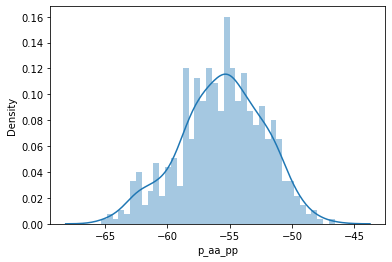

In [64]:
sns.distplot(dscore_picked["p_aa_pp"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


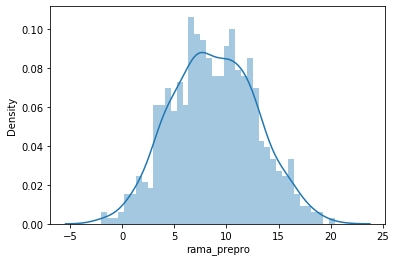

In [65]:
sns.distplot(dscore_picked["rama_prepro"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


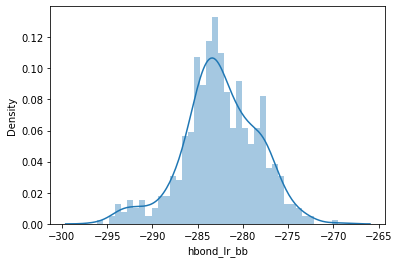

In [66]:
sns.distplot(dscore_picked["hbond_lr_bb"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


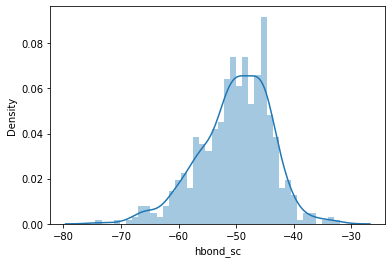

In [67]:
sns.distplot(dscore_picked["hbond_sc"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


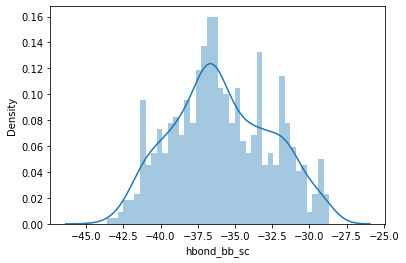

In [68]:
sns.distplot(dscore_picked["hbond_bb_sc"], bins=40)

In [ ]:
#hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
#dscore_picked["%_retained"] = np.nan
#dscore_picked["%_retained_tyr"] = np.nan

#for design in picked_list:
#    print(dscore_picked.loc[dscore_picked["design"] == design])
#    interactions = hbond_dict[design]
#    interact_res = Counter([inter[0:2] for inter in interactions])
#    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
#    num_interactions = float(len(list(interact_res.elements())))
#    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
#    for pdb in glob.glob("round3_surf/" + design + "/" + design + "_*.pdb"):
#        pdb_name = os.path.basename(pdb)
#        pdb_name = os.path.splitext(pdb_name)[0]
#        current_inter_list = []
#        pose = py.pose_from_pdb(pdb)
#        pose.update_residue_neighbors()
#        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
#        for i in range(1, hbond_set.nhbonds()+1):
#            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
#                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
#        current_inter = Counter(current_inter_list)
#        num_curr_inter = 0.0
#        num_curr_inter_tyr = 0.0
#        for inter in current_inter:
#            if inter in interact_res:
#                if current_inter[inter] >= interact_res[inter]:
#                    num_curr_inter += interact_res[inter]
#                elif current_inter[inter] < interact_res[inter]:
#                    num_curr_inter += current_inter[inter]
#                    
#            if inter in interact_res_tyr:
#                if current_inter[inter] >= interact_res_tyr[inter]:
#                    num_curr_inter_tyr += interact_res_tyr[inter]
#                elif current_inter[inter] < interact_res_tyr[inter]:
#                    num_curr_inter_tyr += current_inter[inter]
#        dscore_picked["%_retained"].loc[dscore_picked["description"] == pdb_name ] = num_curr_inter/num_interactions
#        dscore_picked["%_retained_tyr"].loc[dscore_picked["description"] == pdb_name ] = num_curr_inter_tyr/num_interactions_tyr
#print(dscore_picked)

In [100]:
dpicked = dscore_picked.loc[(dscore_picked["hbond_sc"] < -30.0) & (dscore_picked["rama_prepro"] < 11) & (dscore_picked["hbond_lr_bb"] < -277) & (dscore_picked["hbond_bb_sc"] < -25)& (dscore_picked["omega"] < 21.5)]
dpicked.shape

(293, 26)

In [101]:
n = len(pd.unique(dpicked['design'])) 
print(n)

118


In [102]:
print(pd.unique(dpicked['design']))

['28_input_0086_0005_0007_0004_0004' '1_input_0034_0004_00013_0005_0004'
 '0_input_0071_0003_0005_0005_0006' '24_input_0052_0005_0006_0005_0009'
 '30_input_0097_0004_0008_0002_0002' '35_input_0175_0001_0006_0005_0003'
 '43_input_0123_0001_00013_0005_0002' '20_input_0173_0003_00013_0003_0004'
 '44_input_0055_0005_00011_0002_0002' '20_input_0142_0002_0005_0005_0009'
 '38_input_0043_0005_00019_0002_0005' '17_input_0147_0002_0008_0001_0003'
 '3_input_0139_0001_0005_0003_0008' '11_input_0180_0001_00010_0001_0010'
 '29_input_0012_0003_0008_0004_0009' '39_input_0116_0001_00013_0003_0003'
 '1_input_0034_0002_00013_0005_0001' '10_input_0141_0003_00017_0004_0007'
 '44_input_0055_0004_00010_0003_0006' '48_input_0181_0002_0009_0005_0010'
 '39_input_0164_0002_0008_0001_0004' '11_input_0049_0002_0007_0004_0008'
 '32_input_0135_0002_0004_0002_0004' '43_input_0027_0001_0009_0005_0005'
 '46_input_0175_0005_00015_0002_0004' '9_input_0062_0002_00013_0001_0001'
 '30_input_0056_0005_00014_0003_0001' '3_inp

In [103]:
dpicked.to_pickle('networks_selected_for_round4.pickle')

In [ ]:
dpicked = pd.read_pickle('networks_selected_for_round4.pickle')
print(dpicked)

In [104]:
dpicked.groupby(['design'], sort=False)['omega'].min()

design
28_input_0086_0005_0007_0004_0004    21.137
1_input_0034_0004_00013_0005_0004    17.845
0_input_0071_0003_0005_0005_0006     20.937
24_input_0052_0005_0006_0005_0009    20.926
30_input_0097_0004_0008_0002_0002    17.319
                                      ...  
8_input_0092_0004_0006_0001_0002     18.250
4_input_0048_0004_00017_0005_0008    19.348
1_input_0034_0005_0006_0005_0001     19.703
30_input_0056_0005_0007_0004_0006    17.942
3_input_0128_0001_0007_0003_0008     17.662
Name: omega, Length: 118, dtype: float64

In [105]:
idx = dpicked.groupby(['design'])['omega'].transform(min) == dpicked['omega']
df1 = dpicked[idx]
print(df1)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
135    SCORE:    -1220.758               0.0                   0.0   
180    SCORE:    -1208.222               0.0                   0.0   
205    SCORE:    -1238.222               0.0                   0.0   
267    SCORE:    -1186.779               0.0                   0.0   
505    SCORE:    -1240.061               0.0                   0.0   
...       ...          ...               ...                   ...   
17656  SCORE:    -1217.392               0.0                   0.0   
17776  SCORE:    -1218.343               0.0                   0.0   
17841  SCORE:    -1221.922               0.0                   0.0   
17860  SCORE:    -1226.677               0.0                   0.0   
17892  SCORE:    -1227.319               0.0                   0.0   

       dihedral_constraint  dslf_fa13    fa_atr   fa_dun  fa_elec  \
135                  0.978        0.0  -943.070  189.388 -474.711   
180                  

In [106]:
#idx2 = df1.groupby(['design'])['%_retained'].transform(max) == df1['%_retained']
#df2 = df1[idx2]
#print(df2)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


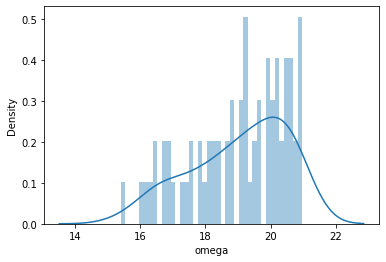

In [85]:
sns.distplot(df1["omega"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


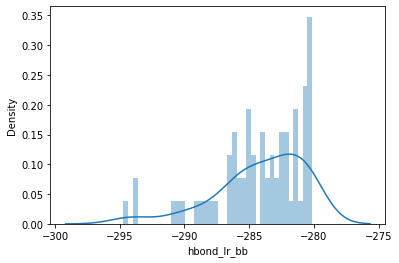

In [86]:
sns.distplot(df1["hbond_lr_bb"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


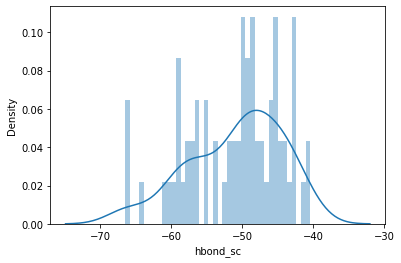

In [87]:
sns.distplot(df1["hbond_sc"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


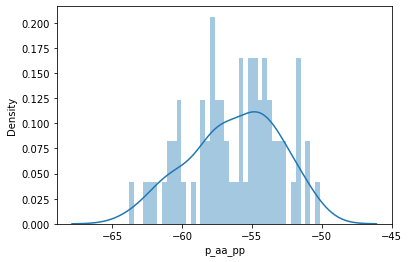

In [88]:
sns.distplot(df1["p_aa_pp"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


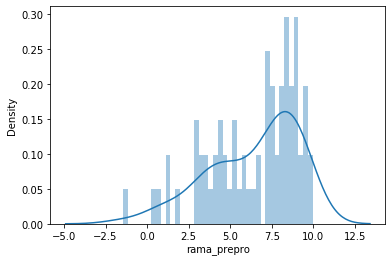

In [89]:
sns.distplot(df1["rama_prepro"], bins=40)

/software/conda/envs/pyrosetta/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


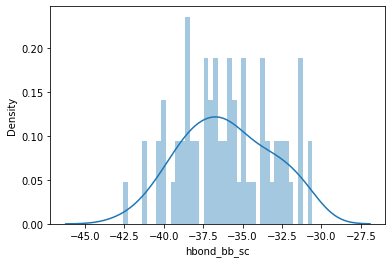

In [90]:
sns.distplot(df1["hbond_bb_sc"], bins=40)

In [107]:
from shutil import copyfile

for index,row in df1.iterrows():
    pdb = row['description'] + ".pdb"
    source = row['design'] + '/' + pdb
    target = "../round4_fasol09/" + pdb
    copyfile(source, target)

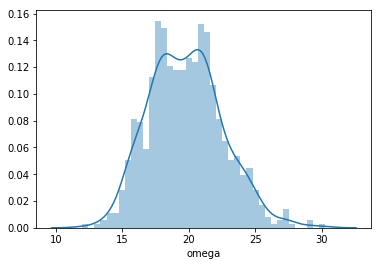

In [28]:
sns.distplot(df3["omega"], bins=40)

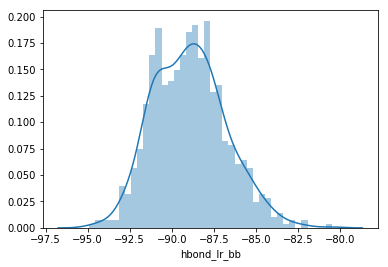

In [29]:
sns.distplot(df3["hbond_lr_bb"], bins=40)

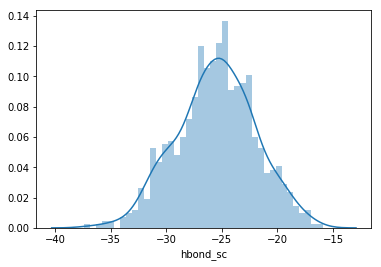

In [30]:
sns.distplot(df3["hbond_sc"], bins=40)

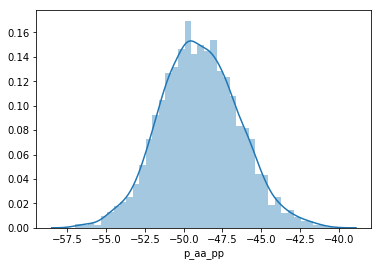

In [31]:
sns.distplot(df2["p_aa_pp"], bins=40)

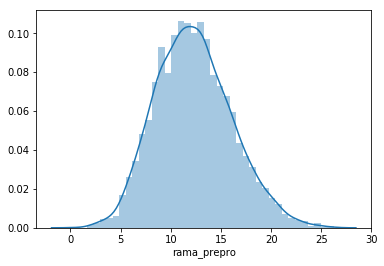

In [32]:
sns.distplot(df2["rama_prepro"], bins=40)